In [1]:
import numpy as np
import scipy.optimize
import scipy.special
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency Matrices

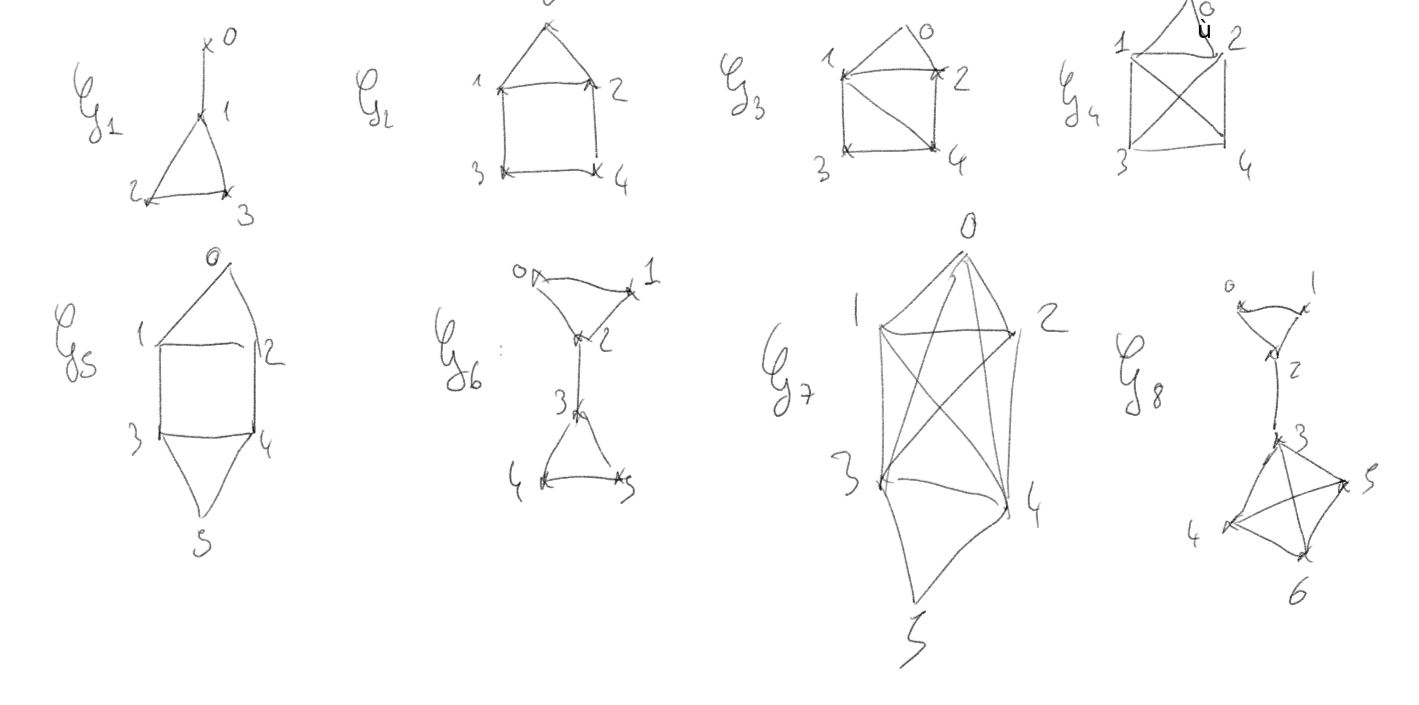

C:\Users\romai\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


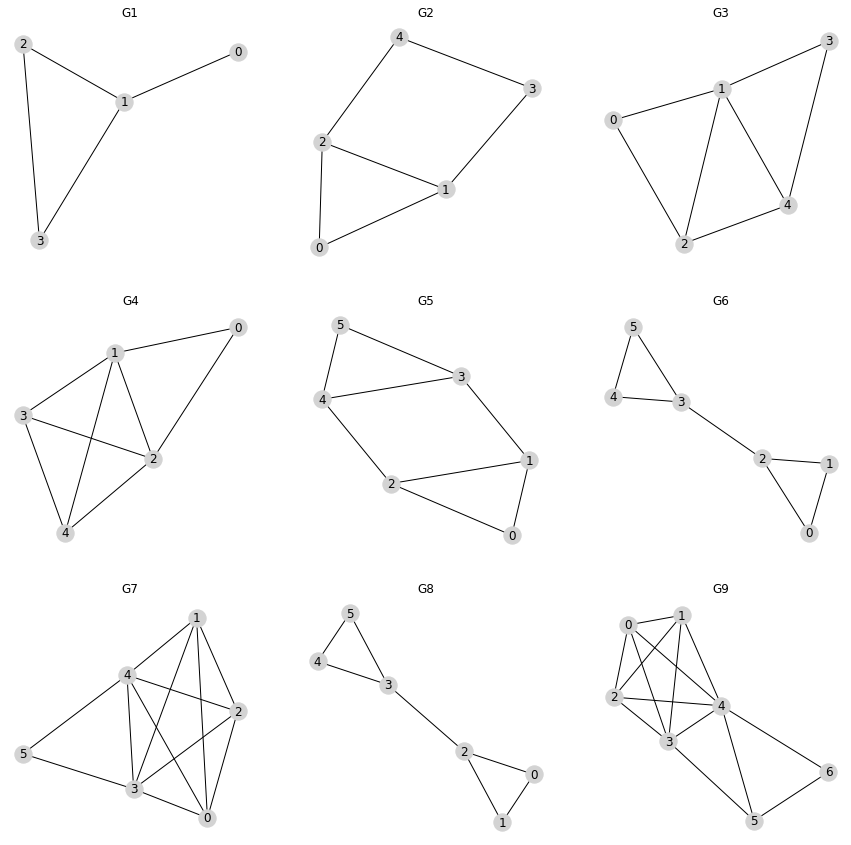

In [2]:
# Stop sign graph
G1 = nx.Graph(incoming_graph_data=[
    (0,1),
    (1,2), (1,3),
    (2,3)
])


# House graph
G2 = nx.Graph(incoming_graph_data=np.array([
 [0,1,1,0,0],
 [1,0,1,1,0],
 [1,1,0,0,1],
 [0,1,0,0,1],
 [0,0,1,1,0]
]))

# Full-House graph
G3 = nx.Graph(incoming_graph_data=[
    (0,1), (0,2),
    (1,2), (1,3),(1,4),
    (2,4), 
    (3,4)
])

# Full-House graph
G4 = nx.Graph(incoming_graph_data=[
    (0,1), (0,2),
    (1,2), (1,3),(1,4),
    (2,4), (2,3),
    (3,4)
])

#
G5 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),(1,3),
    (2,4),
    (3,4),(3,5),
    (4,5)
])

#
G6 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),
    (2,3),
    (3,4),(3,5),
    (4,5)
])

#
G7 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),
    (1,2),(1,3),(1,4),
    (2,3),(2,4),
    (3,4),(3,5),
    (4,5)
])

#
G8 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),
    (1,2),
    (2,3),
    (3,4),(3,5),
    (4,5)
])

#
G9 = nx.Graph(incoming_graph_data=[
    (0,1),(0,2),(0,3),(0,4),
    (1,2),(1,3),(1,4),
    (2,3),(2,4),
    (3,4),(3,5),
    (4,5),(4,6),
    (5,6)
])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
ax = axes.flatten()
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9]


for i in range(9):
    nx.draw_networkx(graphs[i], node_color = "lightgray", ax=ax[i])
    ax[i].set_axis_off()
    ax[i].title.set_text("G"+str(i+1))

plt.show()

In [3]:
def spanning_trees(G):
    #print(edges)
    m = G.size()
    n = G.number_of_nodes()
    edges = list(G.edges)
    edge_index_candidates = list(itertools.combinations(range(m),n-1))
    st = []
    for c in edge_index_candidates:
        S = G.edge_subgraph([edges[i] for i in c])
        if nx.is_connected(S):
            if S.number_of_nodes() ==n:
                st.append(S)
    return st

def spanning_tree_constraints(G):
    #Returns the matrix with one line per st
    #With -1 on the first column
    #And 0/1 on next columns whether edge belongs to tree
    st = spanning_trees(G)
    T = len(st)
    m = G.size()
    edges = list(G.edges)
    constraints = np.zeros(shape=(T,m+1))
    constraints[:,0]=-1
    for i, S in enumerate(st):
        for j, e in enumerate(edges):
            if edges[j] in S.edges:
                constraints[i,j+1]=1
    return constraints

def max_min_st(G):
    constraints = spanning_tree_constraints(G)
    T = len(constraints)
    n = G.number_of_nodes()
    m = G.size()
    
    c = np.zeros(m+1)
    c[0] = 1
    
    A_ub = np.zeros(shape=(m+T,m+1))
    for i in range(m):
        A_ub[i,i+1] = -1
    A_ub[m:,:] = constraints
    
    b_ub = np.zeros(shape=(m+T))
    
    A_eq = np.zeros(shape=(1,m+1))
    A_eq[:,1:]=1
    
    b_eq = np.array([1])
    return c, A_ub, b_ub, A_eq, b_eq 


In [4]:
G = G9

c, A_ub, b_ub, A_eq, b_eq = max_min_st(G)
solution = scipy.optimize.linprog(c,A_ub,b_ub,A_eq,b_eq,method="simplex",options={"maxiter":10000})#,method='interior-point') ==> Really strange, the interior point method does not seem to work
print(solution)

     con: array([1.31006317e-14])
     fun: 0.40000000000000513
 message: 'Optimization terminated successfully.'
     nit: 1111
   slack: array([1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
       1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
       1.00000000e-01, 1.00000000e-01, 2.56418343e-15, 0.00000000e+00,
       0.00000000e+00, 2.48066999e-15, 9.68669589e-15, 7.21644966e-15,
       1.22679644e-14, 9.79771819e-15, 9.79771819e-15, 1.13797860e-14,
       8.88178420e-15, 1.39332990e-14, 1.14352972e-14, 1.14352972e-14,
       9.82547377e-15, 7.35522754e-15, 1.24067423e-14, 9.93649607e-15,
       9.93649607e-15, 1.01585407e-14, 7.66053887e-15, 1.27120536e-14,
       1.02695630e-14, 1.02695630e-14, 1.00000000e-01, 1.00000000e-01,
       1.00000000e-01, 8.43769499e-15, 5.96744876e-15, 1.09912079e-14,
       8.52096171e-15, 8.52096171e-15, 9.52016244e-15, 7.03603842e-15,
       1.20875532e-14, 9.60342916e-15, 9.60342916e-15, 7.52176099e-15,
       5.

In [5]:
weights = [scipy.optimize.linprog(*max_min_st(G),method="interior-point")["x"][1:] for G in graphs] #Use simplex

C:\Users\romai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  """Entry point for launching an IPython kernel.
C:\Users\romai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  """Entry point for launching an IPython kernel.
C:\Users\romai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\_linprog_ip.py:116: LinAlgWarning: Ill-conditioned matrix (rcond=3.46695e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
C:\Us

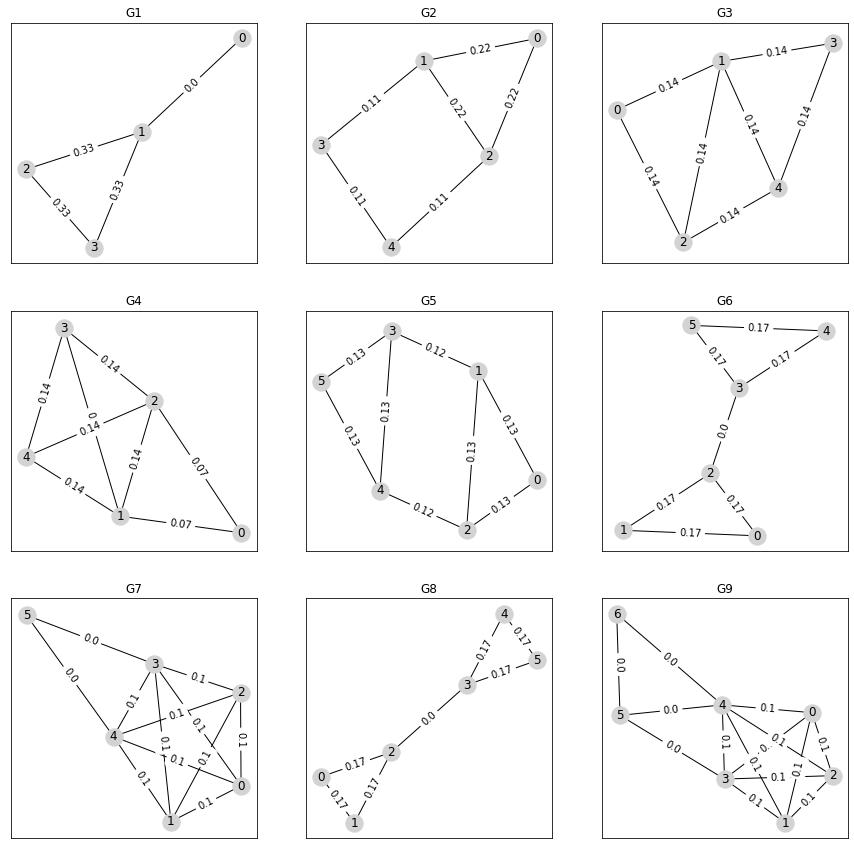

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
ax = axes.flatten()
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9]


for i in range(9):
    pos = nx.spring_layout(graphs[i])
    nx.draw_networkx(graphs[i],pos = pos, node_color = "lightgray", ax=ax[i])
    labels = {list(graphs[i].edges)[j]: np.round(weights[i][j], decimals = 2) for j in range(graphs[i].size())}
    nx.draw_networkx_edge_labels(graphs[i],pos,edge_labels=labels, ax=ax[i])
    ax[i].title.set_text("G"+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])


plt.savefig("optimal_weights.png")

# Some notes / Tutorial

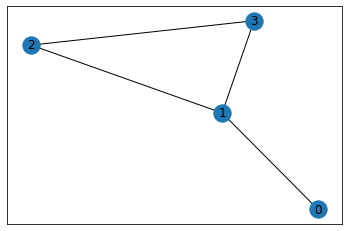

In [7]:
G=G1
nx.draw_networkx(G)

In [8]:
#Initialize LP problem
c, A_ub, b_ub, A_eq, b_eq = max_min_st(G)

In [9]:
#Variables = [total_weight, w_e1, w_e2, w_e3, w_e4]
#Objective = minimize total weight
c

array([1., 0., 0., 0., 0.])

In [10]:
#Variables = [total_weight, w_e1, w_e2, w_e3, w_e4]
#Constraints = positive weights + total weight >= weight of spanning trees for all spanning trees
A_ub

array([[ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.],
       [-1.,  1.,  1.,  1.,  0.],
       [-1.,  1.,  1.,  0.,  1.],
       [-1.,  1.,  0.,  1.,  1.]])

In [11]:
b_ub

array([0., 0., 0., 0., 0., 0., 0.])

In [12]:
#Constraint = total weight = 1
A_eq

array([[0., 1., 1., 1., 1.]])

In [13]:
b_eq

array([1])

In [14]:
#Solve NP problem
solution = scipy.optimize.linprog(c,A_ub,b_ub,A_eq,b_eq,method="simplex",options={"maxiter":10000})#,method='interior-point') ==> Really strange, the interior point method does not seem to work
print(solution)

     con: array([0.])
     fun: 0.6666666666666666
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
       0.        , 0.        ])
  status: 0
 success: True
       x: array([0.66666667, 0.        , 0.33333333, 0.33333333, 0.33333333])


# Same for Blanced Covering

In [15]:
#Variables = least likely edge, proba of each spanning tree
#Objective = Maximize the least likely edge
cp = np.array([-1.,0,0,0])

In [16]:
#Constraints_ub = positive proba + least likely edge < likelyness of each edge (one line per edge)
A_ubp = np.array([
    [0.,-1,0,0],
    [0.,0,-1,0],
    [0.,0,0,-1],
    [1,-1,-1,-1],#top edge
    [1,-1,-1,0],
    [1,-1,0,-1],
    [1,0,-1,-1]    
])
b_ubp = np.array([0.,0,0,0,0,0,0])

In [17]:
#Constraint_eq = total weight = 1
A_eqp = np.array([[0.,1,1,1]])
b_eqp = np.array([1])

In [18]:
solutionp = scipy.optimize.linprog(cp,A_ubp,b_ubp,A_eqp,b_eqp,method="simplex",options={"maxiter":10000})#,method='interior-point') ==> Really strange, the interior point method does not seem to work
print(solutionp)

     con: array([0.])
     fun: -0.6666666666666666
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.        ,
       0.        , 0.        ])
  status: 0
 success: True
       x: array([0.66666667, 0.33333333, 0.33333333, 0.33333333])


# Balanced Covering

In [19]:
T = len(spanning_tree_constraints(G))
n = G.number_of_nodes()
m = G.size()
A_ubp = np.zeros(shape=(T+m,T+1))
for i in range(T):
    A_ubp[i,i+1] = -1
A_ubp[T:,1:] = np.transpose(-spanning_tree_constraints(G)[:,1:])
A_ubp[T:,0] = 1
A_ubp

array([[ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 1., -1., -1., -1.],
       [ 1., -1., -1., -0.],
       [ 1., -1., -0., -1.],
       [ 1., -0., -1., -1.]])

In [20]:
np.transpose(-spanning_tree_constraints(G)[:,1:])

array([[-1., -1., -1.],
       [-1., -1., -0.],
       [-1., -0., -1.],
       [-0., -1., -1.]])

In [21]:
def balanced_covering(G):
    c, A_ub, b_ub, A_eq, b_eq = max_min_st(G)
        
    constraints = spanning_tree_constraints(G)
    T = len(constraints)#number of trees
    n = G.number_of_nodes()#number of nodes
    m = G.size()#num edges
    
    cp = np.zeros(T+1)
    cp[0] = -1
    
    A_ubp = np.zeros(shape=(T+m,T+1))
    for i in range(T):
        A_ubp[i,i+1] = -1
    A_ubp[T:,1:] = np.transpose(-spanning_tree_constraints(G)[:,1:])
    A_ubp[T:,0] = 1
    
    b_ubp = np.zeros(shape=(T+m))
    
    A_eqp = np.zeros(shape=(1,T+1))
    A_eqp[:,1:]=1
    
    b_eqp = np.array([1])
    return cp, A_ubp, b_ubp, A_eqp, b_eqp 

In [22]:
G = G9

cp, A_ubp, b_ubp, A_eqp, b_eqp = balanced_covering(G)
solutionp = scipy.optimize.linprog(cp,A_ubp,b_ubp,A_eqp,b_eqp,method="simplex",options={"maxiter":10000})

In [23]:
#Recover rho_e
rho_T = solutionp["x"][1:]
rho_e = np.transpose(spanning_tree_constraints(G)[:,1:]).dot(rho_T)
rho_e

array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.8])

In [24]:
def rho_e(G): 
    cp, A_ubp, b_ubp, A_eqp, b_eqp = balanced_covering(G)
    solutionp = scipy.optimize.linprog(cp,A_ubp,b_ubp,A_eqp,b_eqp,method="simplex",options={"maxiter":10000})
    rho_T = solutionp["x"][1:]
    rho_e = np.transpose(spanning_tree_constraints(G)[:,1:]).dot(rho_T)
    return rho_e

In [25]:
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9]
weights = [rho_e(G) for G in graphs] #Use simplex

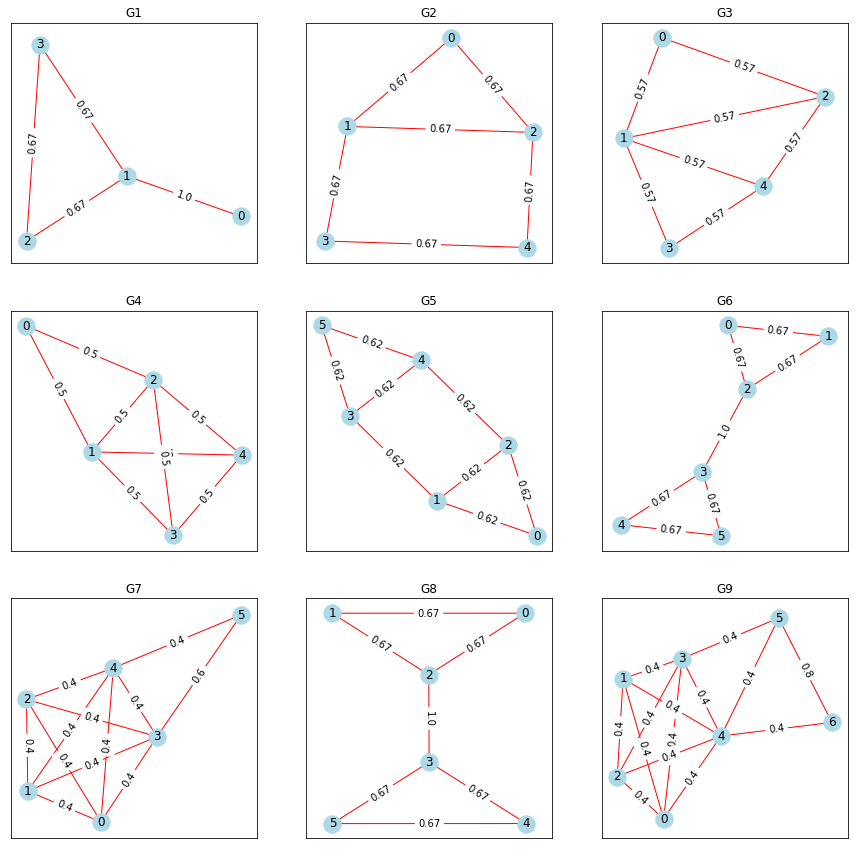

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
ax = axes.flatten()
graphs = [G1,G2,G3,G4,G5,G6,G7,G8,G9]


for i in range(9):
    pos = nx.spring_layout(graphs[i])
    nx.draw_networkx(graphs[i],pos = pos, node_color = "lightblue",edge_color ="red", ax=ax[i])
    labels = {list(graphs[i].edges)[j]: np.round(weights[i][j], decimals = 2) for j in range(graphs[i].size())}
    nx.draw_networkx_edge_labels(graphs[i],pos,edge_labels=labels, ax=ax[i])
    ax[i].title.set_text("G"+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])


plt.savefig("optimal_distribution.png")

In [27]:
def eq_to_ub(A_ub,b_ub,A_eq,b_eq):
    #Creates two ub constraints per eq constraint
    A_ub_add = np.concatenate((A_eq,A_eq.copy()))
    b_ub_add = np.concatenate((b_eq,-b_eq.copy()))
    A_ub2 = np.concatenate((A_ub, A_ub_add))
    b_ub2 = np.concatenate((b_ub,b_ub_add))
    return A_ub2,b_ub2

In [28]:
c,A_ub,b_ub,A_eq,b_eq

(array([1., 0., 0., 0., 0.]), array([[ 0., -1.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0., -1.],
        [-1.,  1.,  1.,  1.,  0.],
        [-1.,  1.,  1.,  0.,  1.],
        [-1.,  1.,  0.,  1.,  1.]]), array([0., 0., 0., 0., 0., 0., 0.]), array([[0., 1., 1., 1., 1.]]), array([1]))

In [29]:
A_ub2,b_ub2 = eq_to_ub(A_ub,b_ub,A_eq,b_eq)
c, A_ub2, b_ub2

(array([1., 0., 0., 0., 0.]), array([[ 0., -1.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0., -1.],
        [-1.,  1.,  1.,  1.,  0.],
        [-1.,  1.,  1.,  0.,  1.],
        [-1.,  1.,  0.,  1.,  1.],
        [ 0.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  1.,  1.,  1.]]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.]))

In [30]:
scipy.optimize.linprog(c,A_ub2,b_ub2)

     con: array([], dtype=float64)
     fun: 24126779412.88129
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 4
   slack: array([ 5.83270935e-02,  2.50327349e-01,  2.50327349e-01,  2.50327349e-01,
        2.41267794e+10,  2.41267794e+10,  2.41267794e+10,  1.90690861e-01,
       -1.80930914e+00])
  status: 2
 success: False
       x: array([2.41267794e+10, 5.83270935e-02, 2.50327349e-01, 2.50327349e-01,
       2.50327349e-01])

In [31]:
G1.edges

EdgeView([(0, 1), (1, 2), (1, 3), (2, 3)])

In [32]:
cons = spanning_tree_constraints(G)
cons_p = cons.T
cons_p[0] = 1
cons_p
n = G.number_of_nodes()
m = G.size()

In [33]:
c, A_ub, b_ub, A_eq, b_eq = max_min_st(G)

k = len(b_ub)
r = len(b_eq)

b = np.concatenate((b_ub,b_eq))
A = np.concatenate((A_ub,A_eq))

c_ub = c[:b_ub]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
b_ub

In [ ]:
b_eq

In [ ]:
A_eq

In [ ]:
A_ub

In [ ]:
A

In [ ]:
def dual(c, A_ub, b_ub, A_eq, b_eq):
    b = 

In [ ]:
cons_p.shape

In [ ]:
def min_max_st(G):
    constraints = spanning_tree_constraints(G)
    T = len(constraints)
    n = G.number_of_nodes()
    m = G.size()
    
    c = np.zeros(T+1)
    c[0] = 1
    
    A_ub = np.zeros(shape=(m+T,m+1))
    for i in range(m):
        A_ub[i,i+1] = -1
    A_ub[m:,:] = constraints
    
    b_ub = np.zeros(shape=(m+T))
    
    A_eq = np.zeros(shape=(1,m+1))
    A_eq[:,1:]=1
    
    b_eq = np.array([1])
    return c, A_ub, b_ub, A_eq, b_eq 

In [ ]:
G = G9

c, A_ub, b_ub, A_eq, b_eq = max_min_st(G)
solution = scipy.optimize.linprog(c,A_ub,b_ub,A_eq,b_eq,method="simplex",options={"maxiter":10000})#,method='interior-point') ==> Really strange, the interior point method does not seem to work
print(solution)

In [ ]:
def spanning_tree_constraints_primal(G):
    cons = spanning_tree_constraints(G)